In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VARMAX
from sklearn.metrics import mean_squared_error
# VARMA example
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random
# contrived dataset with dependency
data = list()
for i in range(100):
    v1 = random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)


In [10]:
data

[[0.5689289076588332, 1.2760643917240369],
 [0.0243023412483252, 0.621719075318694],
 [0.19468962584602567, 0.6608091283925325],
 [0.7745191434410803, 1.5361343127147051],
 [0.2668040657968853, 0.5428241916918799],
 [0.1550511218148546, 1.063125134204771],
 [0.4972253305057167, 0.9930893447616231],
 [0.0826820622203136, 0.22177967032510004],
 [0.7092297317372462, 1.6882093103425921],
 [0.8749312271528679, 1.1552099800985896],
 [0.1449471291392571, 0.261558249044226],
 [0.6670977812888078, 1.3427921570823473],
 [0.5930336921949154, 1.5637018909924927],
 [0.52781129021976, 1.1674991996054276],
 [0.13314083801156418, 1.1216152651267133],
 [0.27513104432497804, 1.133672633443675],
 [0.576020230446381, 0.8660334734348779],
 [0.12466507607066657, 0.8677723480522461],
 [0.47052435882664423, 1.1987539478288933],
 [0.36956550573356883, 0.37179796488281847],
 [0.493775505483103, 1.2470051762232512],
 [0.9582560474117268, 1.4835690654602653],
 [0.2115381980762715, 0.9804309287793436],
 [0.0866393

In [11]:
# fit model
model = VARMAX(data, order=(2, 2))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.forecast()
print(yhat)

/Users/alket/miniconda3/envs/myenv/lib/python3.10/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/Users/alket/miniconda3/envs/myenv/lib/python3.10/site-packages/statsmodels/tsa/statespace/varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")


[[0.41203527 1.17327437]]


/Users/alket/miniconda3/envs/myenv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


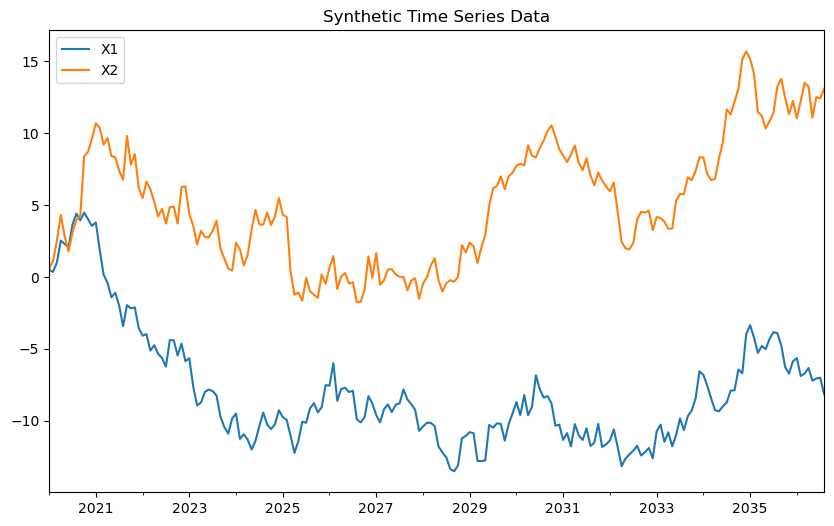

In [12]:
np.random.seed(42)

# Create a time index
time_index = pd.date_range(start='2020-01-01', periods=200, freq='M')

# Generate two correlated time series
x1 = np.cumsum(np.random.normal(size=len(time_index)))
x2 = np.cumsum(np.random.normal(size=len(time_index))) + 0.5 * x1

# Combine the series into a DataFrame
data = pd.DataFrame({'X1': x1, 'X2': x2}, index=time_index)

# Plot the time series
data.plot(figsize=(10, 6))
plt.title('Synthetic Time Series Data')
plt.show()


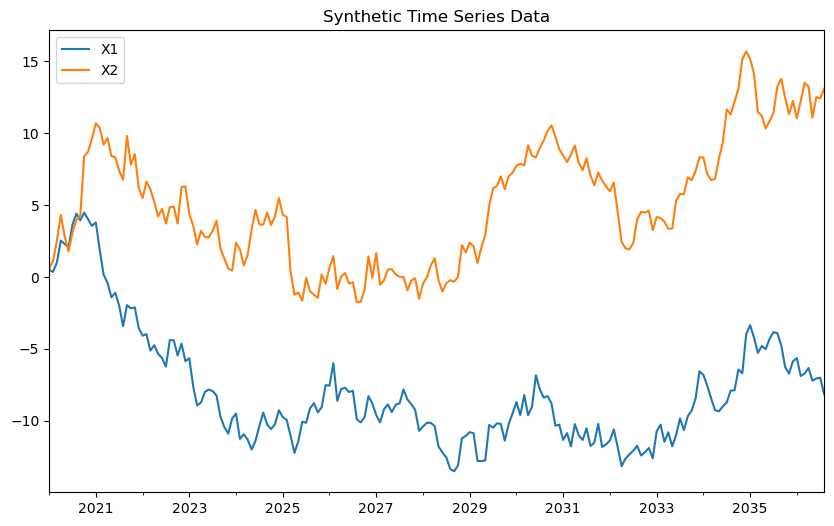

In [14]:
np.random.seed(42)

# Create a time index
time_index = pd.date_range(start='2020-01-01', periods=200, freq='M')

# Generate two correlated time series
x1 = np.cumsum(np.random.normal(size=len(time_index)))
x2 = np.cumsum(np.random.normal(size=len(time_index))) + 0.5 * x1

# Combine the series into a DataFrame
data = pd.DataFrame({'X1': x1, 'X2': x2}, index=time_index)

# Plot the time series
data.plot(figsize=(10, 6))
plt.title('Synthetic Time Series Data')
plt.show()


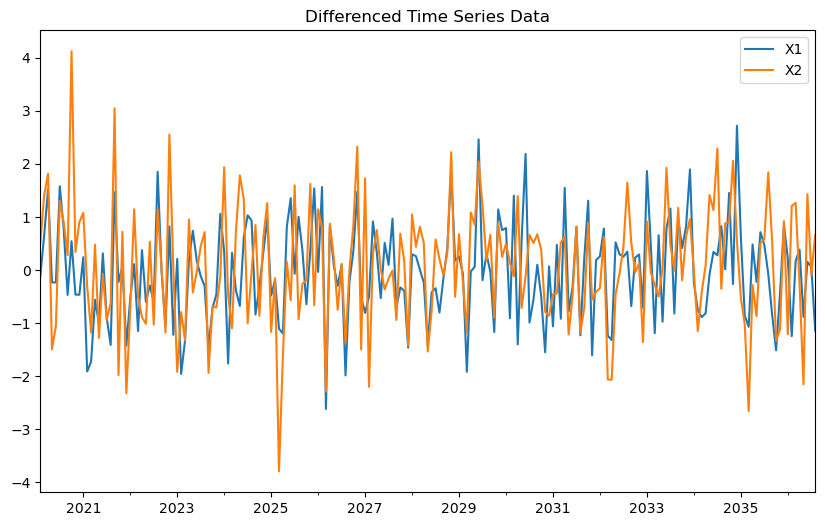

In [15]:
# Differencing the data to make it stationary
data_diff = data.diff().dropna()

# Plot the differenced series
data_diff.plot(figsize=(10, 6))
plt.title('Differenced Time Series Data')
plt.show()

In [17]:
model = VARMAX(train, order=(1, 1))  # You can experiment with different orders
fitted_model = model.fit(disp=False)
print(fitted_model.summary())


/Users/alket/miniconda3/envs/myenv/lib/python3.10/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/Users/alket/miniconda3/envs/myenv/lib/python3.10/site-packages/statsmodels/tsa/statespace/varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
/Users/alket/miniconda3/envs/myenv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Statespace Model Results                           
Dep. Variable:           ['X1', 'X2']   No. Observations:                  159
Model:                     VARMA(1,1)   Log Likelihood                -431.797
                          + intercept   AIC                            889.594
Date:                Tue, 13 Aug 2024   BIC                            929.490
Time:                        00:42:51   HQIC                           905.795
Sample:                    02-29-2020                                         
                         - 04-30-2033                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):             0.29, 0.00   Jarque-Bera (JB):           0.43, 8.70
Prob(Q):                        0.59, 0.95   Prob(JB):                   0.81, 0.01
Heteroskedasticity (H):         1.13, 0.49   Skew:                       0.12, 0.24
Prob(H) (two-sided):            0.66,

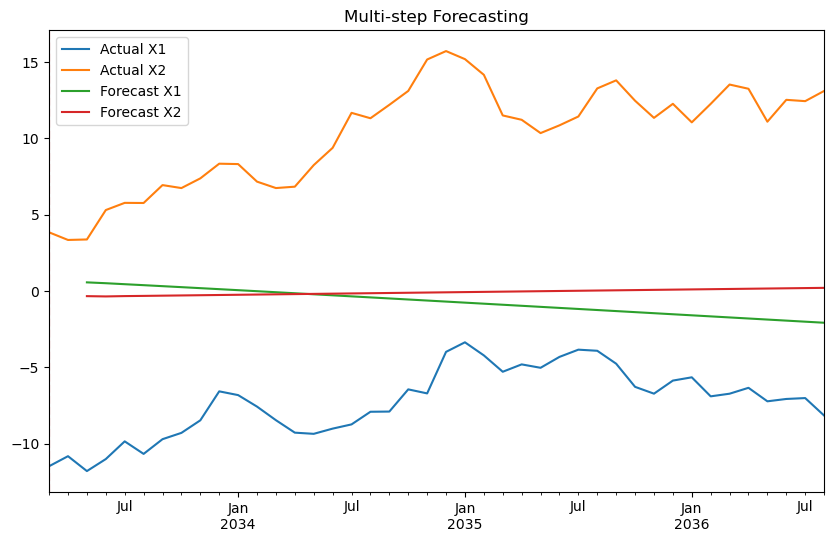

In [19]:
# Number of steps to forecast
n_forecast = len(test)

# Forecasting multiple steps ahead
forecast = fitted_model.get_forecast(steps=n_forecast)
forecast_df = forecast.predicted_mean

# Revert the differencing to get the forecast in the original scale
forecast_df = train.iloc[-1] + forecast_df.cumsum()

# Combine actual and forecasted data
test_forecast = pd.concat([data.iloc[train_size-1:], forecast_df], axis=1)
test_forecast.columns = ['Actual X1', 'Actual X2', 'Forecast X1', 'Forecast X2']

# Plot the forecast
test_forecast.plot(figsize=(10, 6))
plt.axvline(data.index[train_size-1], color='r', linestyle='--')  # Mark the point where forecast starts
plt.title('Multi-step Forecasting')
plt.show()


In [20]:
# Calculate the MSE for each time series
mse_x1 = mean_squared_error(test['X1'], forecast_df['X1'])
mse_x2 = mean_squared_error(test['X2'], forecast_df['X2'])

print(f'Multi-step MSE for X1: {mse_x1}')
print(f'Multi-step MSE for X2: {mse_x2}')


Multi-step MSE for X1: 1.7497360780436217
Multi-step MSE for X2: 1.4411816948642382
